In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

superstore = pd.read_csv('global_superstore_sales.csv')

Task 1.1: 
Count Sub-Category Frequency
Find how many times each sub-category appears.

Sub-Category
Accessories    71
Copiers        63
Phones         60
Binders        58
Chairs         54
Tables         52
Bookcases      49
Pens           49
Paper          44
Name: count, dtype: int64


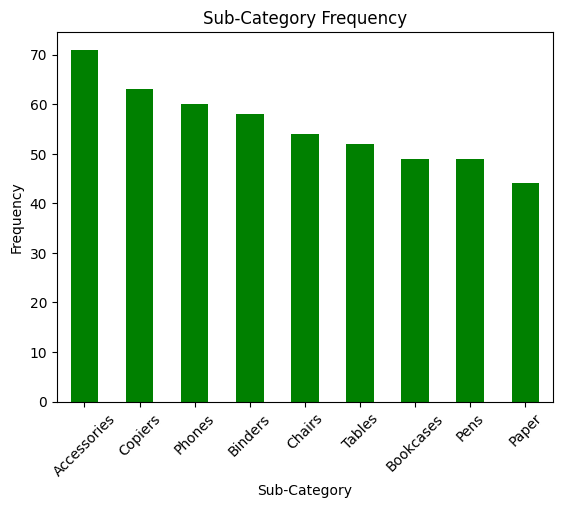

In [89]:
frequency_of_sub_category = superstore['Sub-Category'].value_counts()
print(frequency_of_sub_category)
frequency_of_sub_category.plot(kind='bar', color='green')
plt.ylabel('Frequency')
plt.title('Sub-Category Frequency')
plt.xticks(rotation=45)
plt.show()

Task 1.2:
Average Sales by Category
Goal: Find and visualize average sales for each main category.

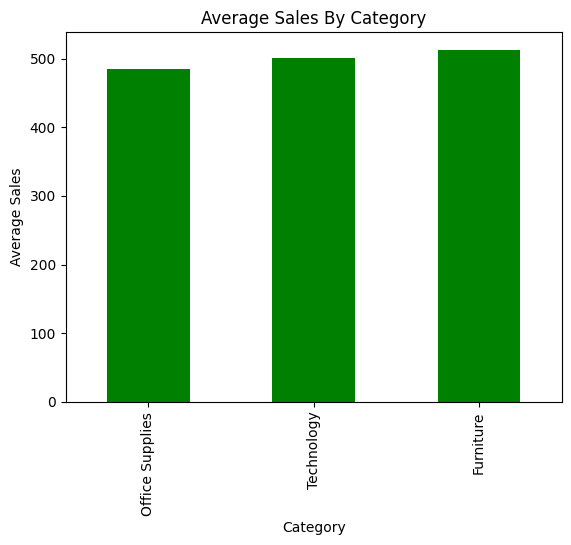

In [90]:
average_sales_per_categories = superstore.groupby('Category')['Sales'].mean()
average_sales_per_categories.sort_values().plot(kind='bar', color='green')
plt.ylabel('Average Sales')
plt.title('Average Sales By Category')
plt.show()

Task 2.1:
Monthly Sales Trend
Goal: Plot sales trend by month

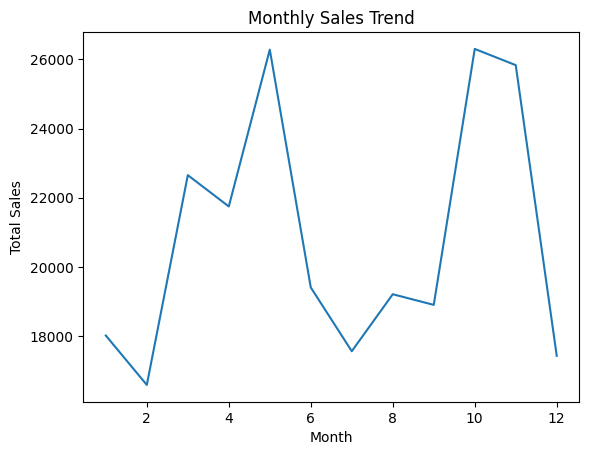

In [91]:
superstore['month'] = pd.to_datetime(superstore['Order Date']).dt.month
grouped_month = superstore.groupby('month')['Sales'].sum()

grouped_month.plot(kind='line', x='month', y='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

Task 2.2:
Region-Wise Sales
Goal: Compare total sales by region.

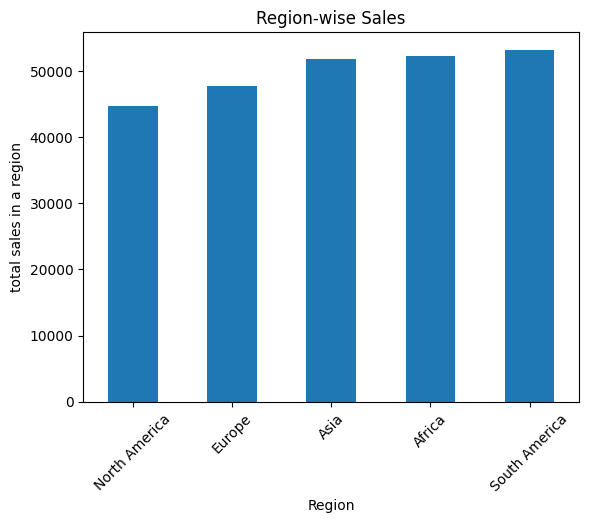

In [92]:
region_wise_sales = superstore.groupby('Region')['Sales'].sum()
sort_region_wise_sales = region_wise_sales.sort_values()

sort_region_wise_sales.plot(kind='bar', x='Region', y='Total Sales')
plt.title('Region-wise Sales')
plt.ylabel('total sales in a region')
plt.xticks(rotation=45)
plt.show()

Task 3.1:
Profit vs. Sales Scatter Plot
Goal: Visualize relationship between sales and profit.

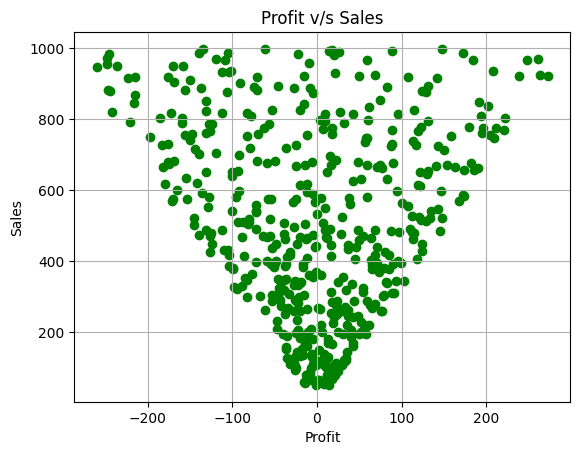

In [93]:
plt.scatter(superstore['Profit'], superstore['Sales'], color='green')
plt.title('Profit v/s Sales')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Task 3.2:
Top 5 Most Profitable Countries
Goal: Identify and plot top 5 countries with highest total profit.

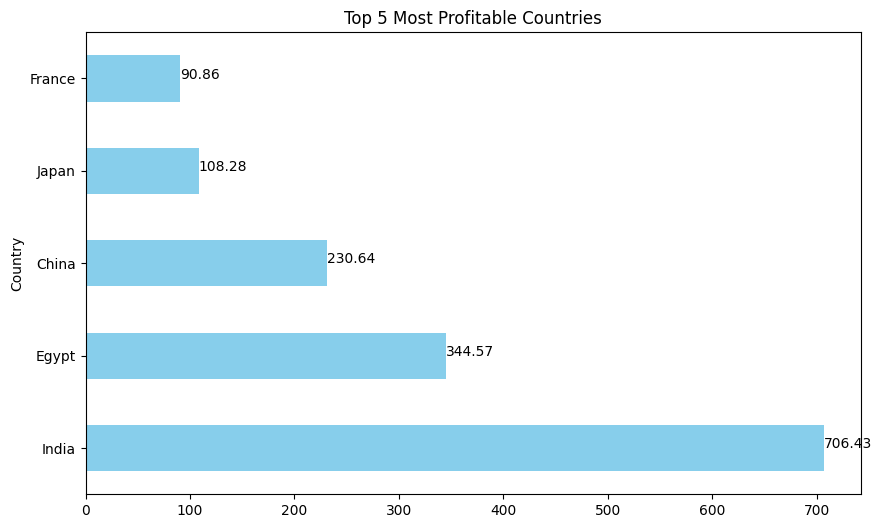

In [97]:
profitable_countries = superstore.groupby('Country')['Profit'].sum()
top_5_profitable_countries = profitable_countries.sort_values(ascending=False).head()
top_5_profitable_countries.plot(kind='barh', color='skyblue', figsize=(10,6))
for i, value in enumerate(top_5_profitable_countries):
    plt.text(value, i, f"{value:.2f}")

plt.title('Top 5 Most Profitable Countries')
plt.show()

Task 4.1:
Detect Missing Values
Goal: Identify and handle any missing values in the dataset.


In [ ]:
superstore.isnull().sum()
superstore_cleaned = superstore.dropna() # no missing values

Task 4.2:
Monthly Profit Trend by Region
Goal: For each region, show monthly profit trend (line chart per region).

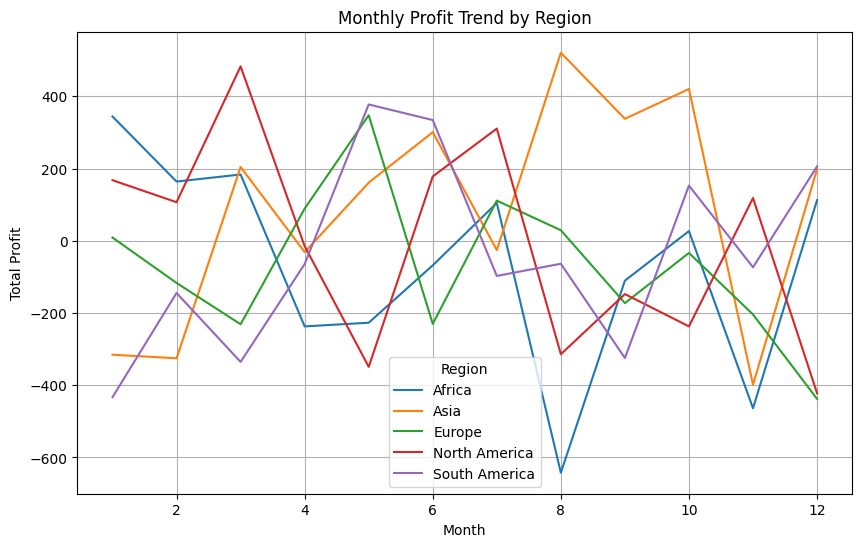

In [98]:
monthly_profit = superstore.groupby(['Region', 'month'])['Profit'].sum().unstack()

monthly_profit.T.plot(kind='line', figsize=(10,6))
plt.title('Monthly Profit Trend by Region')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Region')
plt.show()

Task 5.1:
Profitability Analysis — Category vs Sub-Category
Goal: Heatmap of average profit by Category and Sub-Category.

In [56]:
import seaborn as sns

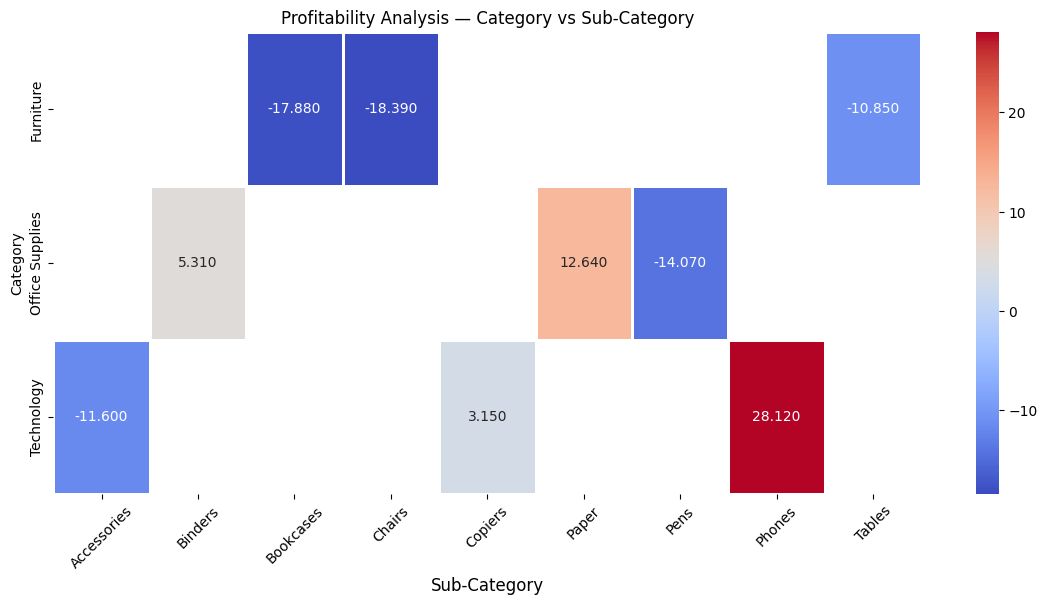

In [101]:
pivot = superstore.pivot_table(
    values = 'Profit',
    index = 'Category',
    columns = 'Sub-Category',
    aggfunc = 'mean'
)
plt.figure(figsize=(14, 6))
sns.heatmap(round(pivot,2), annot=True, fmt='.3f', cmap='coolwarm', linewidths=1)
plt.title('Profitability Analysis — Category vs Sub-Category')
plt.ylabel('Category')
plt.xlabel('Sub-Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Task 5.2:
Export Cleaned and Grouped Data
Goal: Export a CSV file showing total Sales and Profit per country.

In [103]:
total = superstore.groupby('Country')[['Sales', 'Profit']].sum()
total = total.sort_values(by='Sales', ascending=False).reset_index()

total.to_csv('country_summary.csv', index=False)
print(pd.read_csv('country_summary.csv'))

         Country     Sales  Profit
0          India  22427.66  706.43
1            USA  21308.61   34.59
2          Chile  21085.80 -280.36
3        Nigeria  20079.79 -718.34
4         France  18957.61   90.86
5         Brazil  18656.39 -231.05
6          Egypt  16165.74  344.57
7   South Africa  15998.66 -439.73
8             UK  15690.49 -381.39
9          Japan  15687.12  108.28
10         China  13789.92  230.64
11     Argentina  13503.83   44.89
12        Mexico  13402.19  -69.36
13       Germany  13093.67 -550.32
14        Canada  10067.99  -86.08
